In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from collections import Counter

C:\Users\jhony\AppData\Local\Temp\ipykernel_20216\4202930317.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.- Análisis de datos

#### Exploración

Dataset sacado de: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud#creditcard.csv

In [3]:
df = pd.read_csv('../Datasets/creditcard.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

#### Visualizaciones

In [6]:
# para visualizarlo
df_sample = df.sample(frac=0.3, random_state=42)

sns.set_style("whitegrid")

sns.set_palette("inferno")

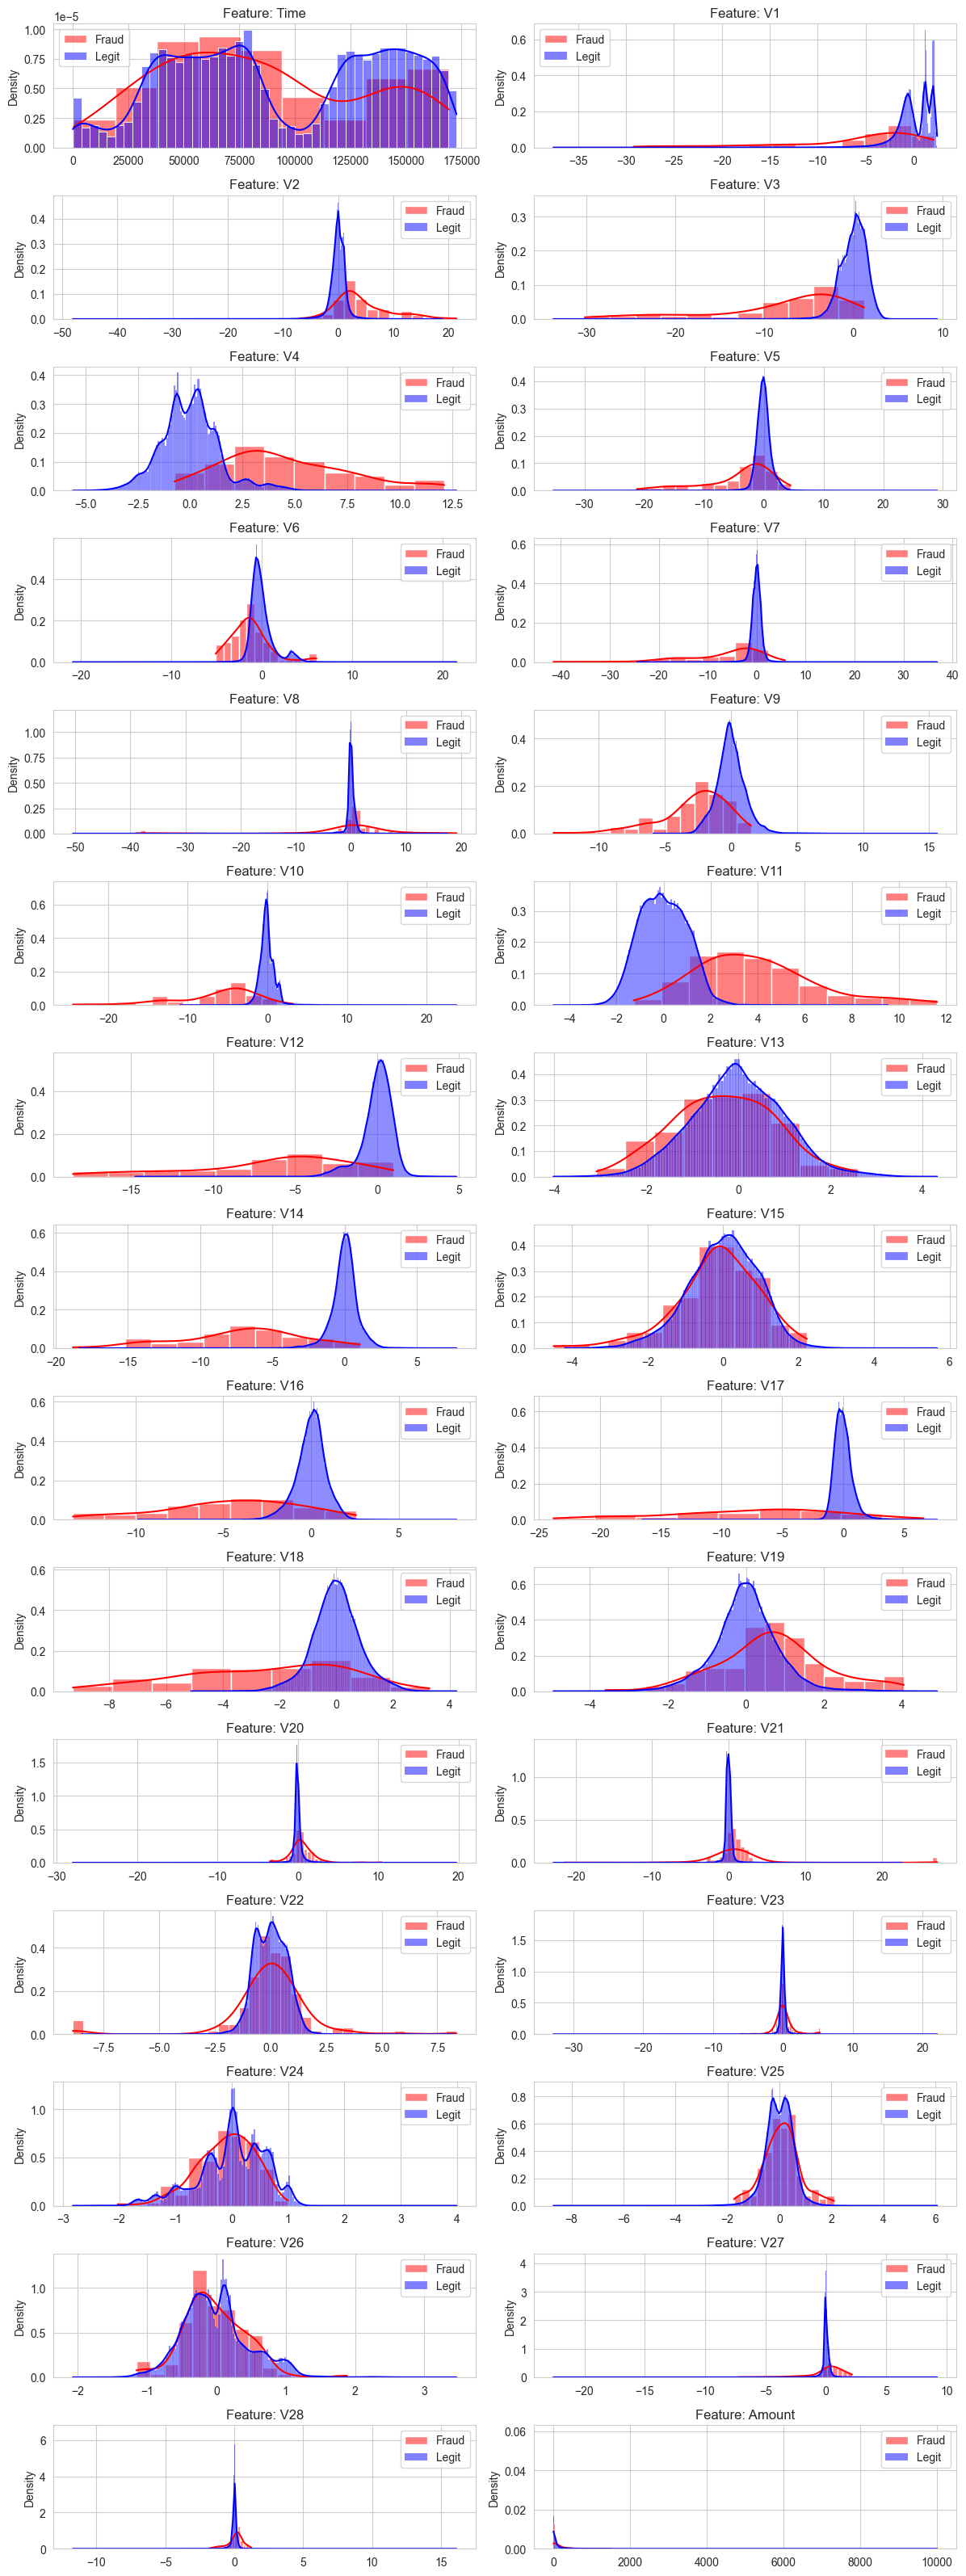

In [ ]:
features = df_sample.drop("Class", axis=1)

plt.figure(figsize=(12, 32))

# Usamos subplots para crear los ejes
num_plots = len(features.columns)
num_rows = (num_plots + 1) // 2  # Número de filas
num_cols = 2  # Dos subgráficos por fila

for i, f in enumerate(features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    # Usando histplot para los casos donde Class == 1
    sns.histplot(data=df_sample[df_sample["Class"] == 1], x=f, kde=True, color="red", stat="density", label="Fraud", alpha=0.5)
    # Usando histplot para los casos donde Class == 0
    sns.histplot(data=df_sample[df_sample["Class"] == 0], x=f, kde=True, color="blue", stat="density", label="Legit", alpha=0.5)
    plt.xlabel('')
    plt.title(f"Feature: {f}")
    plt.legend()

plt.tight_layout()
plt.show()

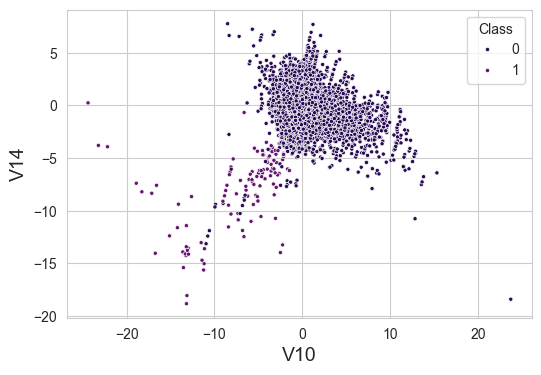

In [ ]:
# Definir el tamaño de la figura
plt.figure(figsize=(6, 4))

# Utilizar seaborn para graficar el scatter plot
sns.scatterplot(x="V10", y="V14", hue="Class", data=df_sample, marker=".")

# Establecer etiquetas de los ejes
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)

# Mostrar el gráfico
plt.show()

## 2.- Preprocesamiento de datos

In [ ]:
df.head()

Eliminamos las columnas amount y time por que no son muy importantes y no estan escaladas

In [10]:
x = df.drop(['Class'], axis=1)

y = df['Class']

In [11]:
rf_model = RandomForestClassifier(n_estimators= 50, random_state= 42, n_jobs= -1)

rf_model.fit(x, y)

rf_model.feature_importances_

array([0.01214968, 0.01452769, 0.01445697, 0.02174168, 0.0284834 ,
       0.01165205, 0.01165503, 0.03318659, 0.01695166, 0.02334284,
       0.08037154, 0.03537322, 0.09547925, 0.0103973 , 0.17342906,
       0.01091875, 0.07490603, 0.16354558, 0.02597454, 0.01354371,
       0.0153942 , 0.01857999, 0.01026763, 0.00734505, 0.01009547,
       0.00844743, 0.02118111, 0.01416706, 0.00981284, 0.01262266])

In [12]:
# Obtener las importancias de las características
feature_importances = {name: score for name, score in zip(list(x), rf_model.feature_importances_)}

# Crear un DataFrame a partir del diccionario de importancias
feature_importances_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])

# Ordenar el DataFrame por importancia en orden descendente
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Eliminamos la columna id

feature_importances_df = feature_importances_df.drop(0)


feature_importances_df = feature_importances_df.head()

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

plt.title('Feature Importance')

plt.show()

## 3.- Entrenamiento

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

clusters = kmeans.fit_predict(x)

In [ ]:
counter = Counter(clusters.tolist())

bad_counter = Counter(clusters[df['Class'] == 1].tolist())

for key in sorted(counter.keys()):
    print("cluster {0}, {1} ejemplos - {2} malicioso".format(
        key, counter[key], bad_counter[key]))